# STAT306 Project Report### 
Group A3 (Chris Jung, Justin Lee, Tetiksha Jain, Ayush Vora)


# Introduction

- add what we wrote in proposal
- add motivation/question (we changed response to alcohol)
- describe dataset/variables

# Analysis

## EDA

In [1]:
# Load necessary libraries
# Install ggplot2 if it is not already installed
if (!require(ggplot2)) {
  install.packages("ggplot2")
  library(ggplot2)
} else {
  library(ggplot2)
}
library(tidyverse)
library(leaps)
library(car)
set.seed(123)

Loading required package: ggplot2

Warning message:
“package ‘stringr’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [2]:
# read data and assign colour fields
redwine_data <- read.csv("winequality-red.csv", header = TRUE, sep = ";")
redwine_data$colour <- "red"
whitewine_data <- read.csv("winequality-white.csv", header = TRUE, sep = ";")
whitewine_data$colour <- "white"

# Combine the two datasets and shuffle
combined_wine_data <- rbind(redwine_data, whitewine_data)
wine_data <- combined_wine_data[sample(nrow(combined_wine_data)), ]


head(wine_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,colour
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
2463,6.2,0.28,0.33,1.7,0.029,24,111,0.99000,3.24,0.50,12.1,6,white
2511,6.2,0.33,0.19,5.6,0.042,22,143,0.99425,3.15,0.63,9.9,5,white
2227,7.0,0.32,0.24,6.2,0.048,31,228,0.99570,3.23,0.62,9.4,6,white
526,10.4,0.64,0.24,2.8,0.105,29,53,0.99980,3.24,0.67,9.9,5,red
4291,6.2,0.28,0.27,10.3,0.030,26,108,0.99388,3.20,0.36,10.7,6,white
2986,5.6,0.49,0.13,4.5,0.039,17,116,0.99070,3.42,0.90,13.7,7,white


In [3]:
# Function to calculate min, max, and mean
calculate_statistics <- function(data) {
  numeric_data <- data[sapply(data, is.numeric)]
  stats <- data.frame(
    Min = round(apply(numeric_data, 2, min), 2),
    Max = round(apply(numeric_data, 2, max), 2),
    Mean = round(apply(numeric_data, 2, mean), 2)
  )
  stats$Feature <- rownames(stats)
  rownames(stats) <- NULL
  return(stats)
}

# Calculate statistics for red and white wines
red_stats <- calculate_statistics(redwine_data[ , !(names(redwine_data) %in% c("color"))])
white_stats <- calculate_statistics(whitewine_data[ , !(names(whitewine_data) %in% c("color"))])

# Add units
units <- c(
  "g(tartaric acid)/dm^3", "g(acetic acid)/dm^3", "g/dm^3", "g/dm^3",
  "g(sodium chloride)/dm^3", "mg/dm^3", "mg/dm^3", "g/dm^3", "", 
  "g(potassium sulphate)/dm^3", "% vol", ""
)

# Add units to the statistics tables
red_stats$Unit <- units
white_stats$Unit <- units

# Reorder columns for readability
red_stats <- red_stats[, c("Feature", "Unit", "Min", "Max", "Mean")]
white_stats <- white_stats[, c("Feature", "Unit", "Min", "Max", "Mean")]

# Print the statistics tables for red and white wines
cat("Red Wine Statistics\n")
print(red_stats)

cat("\nWhite Wine Statistics\n")
print(white_stats)

Red Wine Statistics
                Feature                       Unit  Min    Max  Mean
1         fixed.acidity      g(tartaric acid)/dm^3 4.60  15.90  8.32
2      volatile.acidity        g(acetic acid)/dm^3 0.12   1.58  0.53
3           citric.acid                     g/dm^3 0.00   1.00  0.27
4        residual.sugar                     g/dm^3 0.90  15.50  2.54
5             chlorides    g(sodium chloride)/dm^3 0.01   0.61  0.09
6   free.sulfur.dioxide                    mg/dm^3 1.00  72.00 15.87
7  total.sulfur.dioxide                    mg/dm^3 6.00 289.00 46.47
8               density                     g/dm^3 0.99   1.00  1.00
9                    pH                            2.74   4.01  3.31
10            sulphates g(potassium sulphate)/dm^3 0.33   2.00  0.66
11              alcohol                      % vol 8.40  14.90 10.42
12              quality                            3.00   8.00  5.64

White Wine Statistics
                Feature                       Unit  Min    M

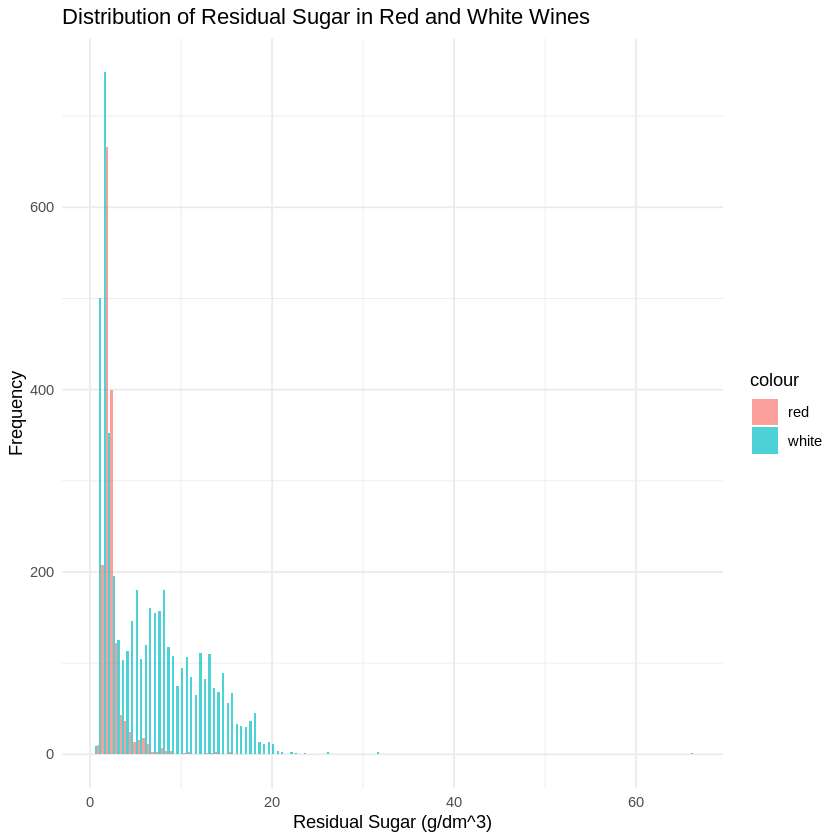

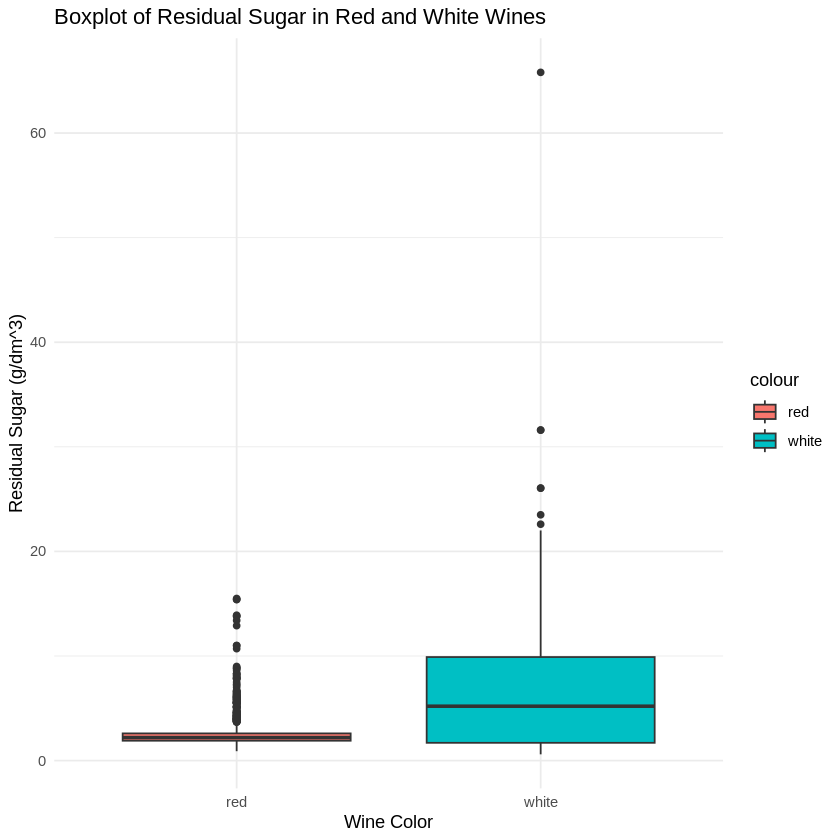

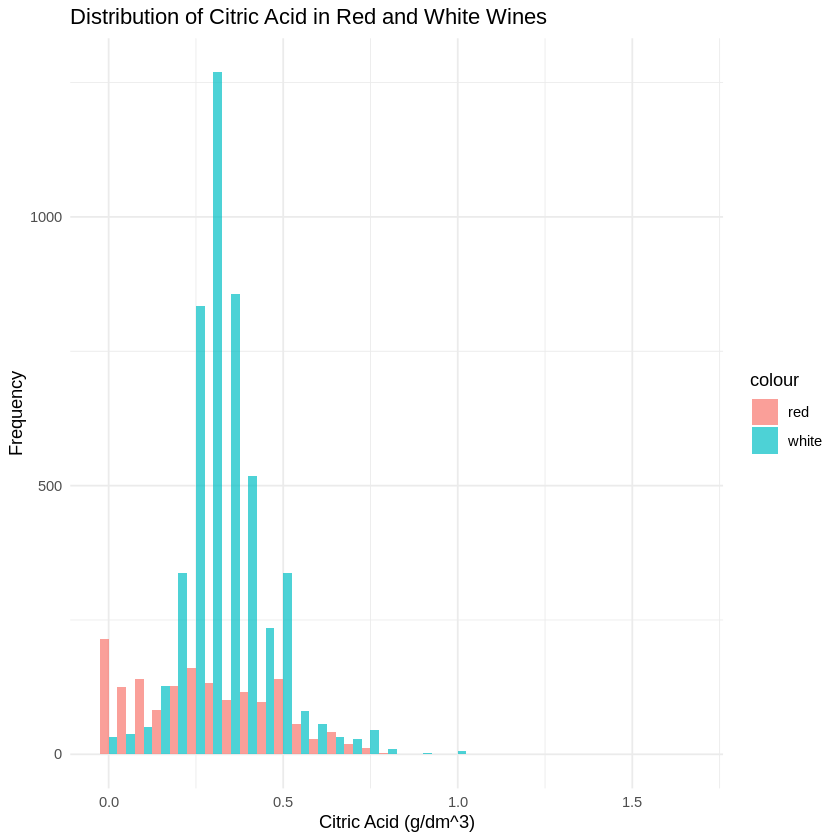

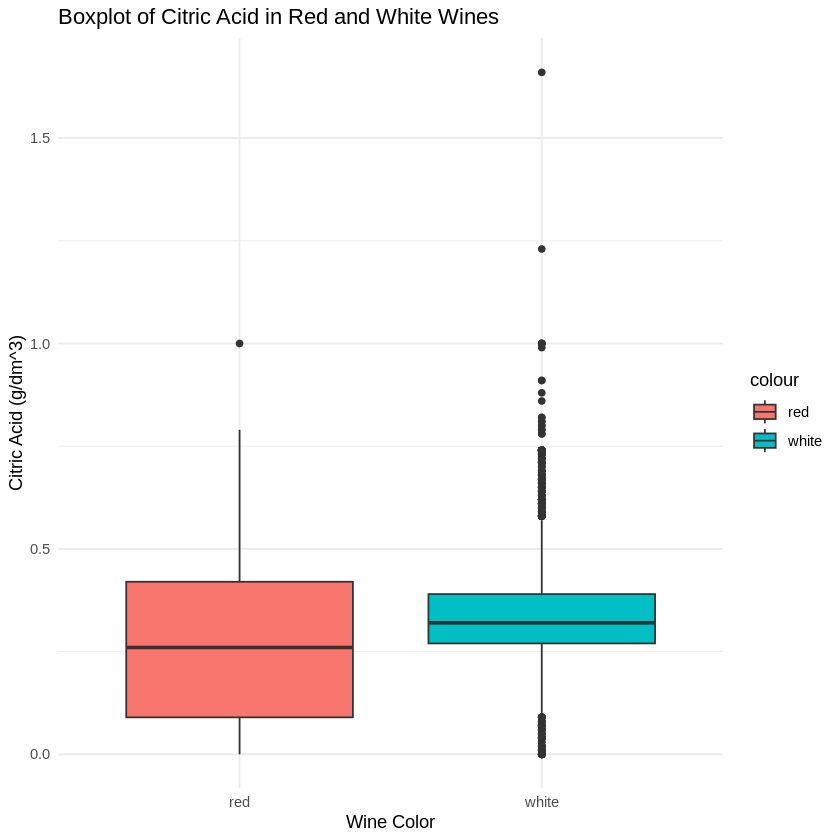

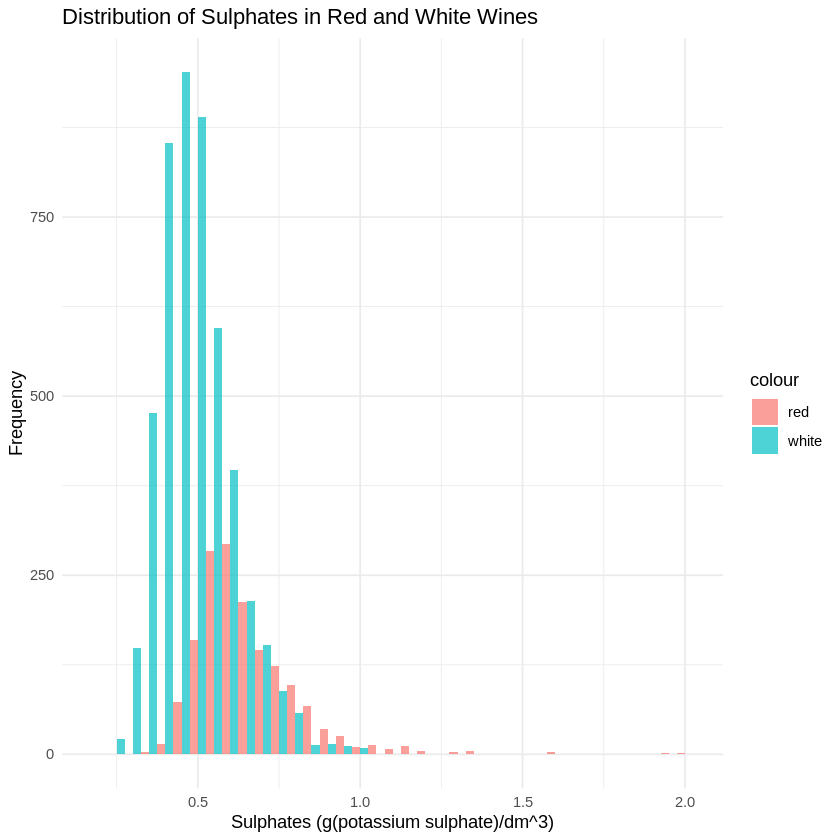

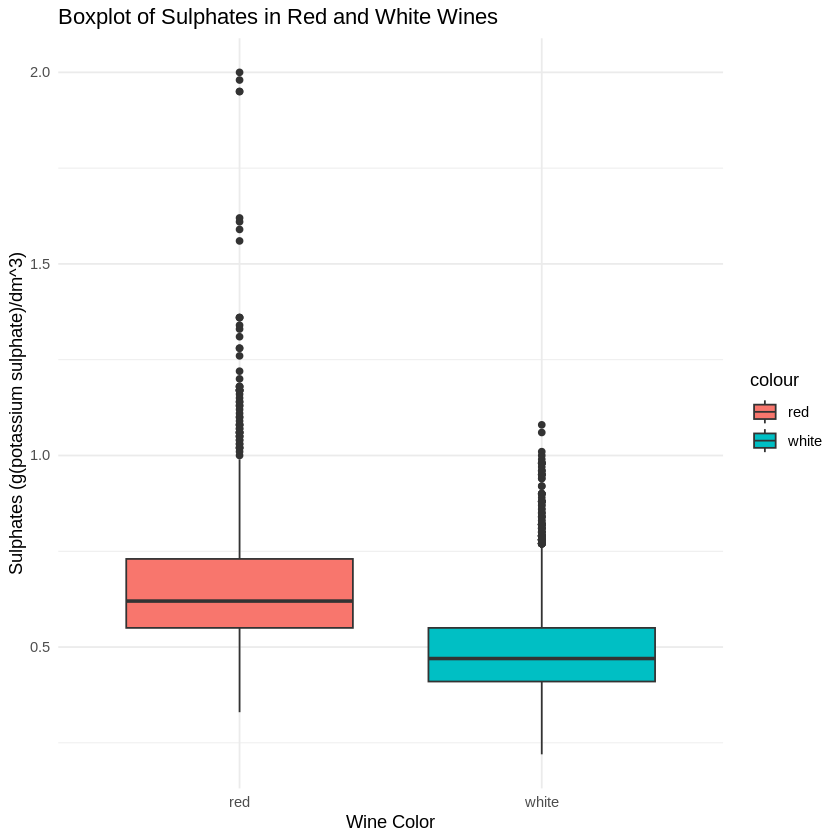

In [4]:
# Histogram for Residual Sugar
ggplot(wine_data, aes(x = residual.sugar, fill = colour)) +
  geom_histogram(binwidth = 0.5, alpha = 0.7, position = "dodge") +
  labs(title = "Distribution of Residual Sugar in Red and White Wines",
       x = "Residual Sugar (g/dm^3)", y = "Frequency") +
  theme_minimal()

# Boxplot for Residual Sugar
ggplot(wine_data, aes(x = colour, y = residual.sugar, fill = colour)) +
  geom_boxplot() +
  labs(title = "Boxplot of Residual Sugar in Red and White Wines",
       x = "Wine Color", y = "Residual Sugar (g/dm^3)") +
  theme_minimal()

# Histogram for Citric Acid
ggplot(wine_data, aes(x = citric.acid, fill = colour)) +
  geom_histogram(binwidth = 0.05, alpha = 0.7, position = "dodge") +
  labs(title = "Distribution of Citric Acid in Red and White Wines",
       x = "Citric Acid (g/dm^3)", y = "Frequency") +
  theme_minimal()

# Boxplot for Citric Acid
ggplot(wine_data, aes(x = colour, y = citric.acid, fill = colour)) +
  geom_boxplot() +
  labs(title = "Boxplot of Citric Acid in Red and White Wines",
       x = "Wine Color", y = "Citric Acid (g/dm^3)") +
  theme_minimal()

# Histogram for Sulphates
ggplot(wine_data, aes(x = sulphates, fill = colour)) +
  geom_histogram(binwidth = 0.05, alpha = 0.7, position = "dodge") +
  labs(title = "Distribution of Sulphates in Red and White Wines",
       x = "Sulphates (g(potassium sulphate)/dm^3)", y = "Frequency") +
  theme_minimal()

# Boxplot for Sulphates
ggplot(wine_data, aes(x = colour, y = sulphates, fill = colour)) +
  geom_boxplot() +
  labs(title = "Boxplot of Sulphates in Red and White Wines",
       x = "Wine Color", y = "Sulphates (g(potassium sulphate)/dm^3)") +
  theme_minimal()


## Methodology

Our goal is to predict values of the response variable `alcohol` using an additive multiple linear regression (MLR) model with a minimum of three input variables. To select the number of input variables in our model, as well as which input variables to include, we will use a forward selection algorithm. A well-fitting model would have a minimal Mallow's $C_p$ statistic that is also approximately equal to the number of parameters, $p$. We want to select a model that fulfils this condition. After fitting the model, we can assess its efficacy by checking its adjusted coefficient of determination $R^2$. The $R^2$ value is the proportion of variance that the model explains, which implies that this is a measure of goodness-of-fit. When adjusted, this statistic also accounts for the number of parameters in the model to limit the inflation that including more parameters brings.

We will firstly fit a full model to compare to the model fitted with forward selection. We begin by splitting the data into two training/testing sets. We will train the model on our training set and test it by using the model to fit the testing set. Before we fit a reduced model, we must decide which variables to include and exclude; we will use forward selection to find the optimal number of variables and which variables to include. To test the out-of-sample performance of both the model selected via forward selection and the full model, we can check their respective root mean square errors (RMSE).

## Execution

In [5]:
# splitting data into testing and training sets
# seed was set at beginning of file
sample <- sample.int(nrow(wine_data), nrow(wine_data)*0.75, replace = FALSE)

seta <- wine_data[sample,]
setb <- wine_data[-sample,]

In [6]:
# fitting full model for both sets
full <- lm(alcohol~., seta)

In [7]:
summary(full)


Call:
lm(formula = alcohol ~ ., data = seta)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2922 -0.2963 -0.0343  0.2504 14.6468 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)           6.344e+02  6.202e+00  102.296  < 2e-16 ***
fixed.acidity         5.048e-01  1.023e-02   49.356  < 2e-16 ***
volatile.acidity      8.339e-01  6.607e-02   12.623  < 2e-16 ***
citric.acid           5.539e-01  6.375e-02    8.690  < 2e-16 ***
residual.sugar        2.248e-01  3.431e-03   65.533  < 2e-16 ***
chlorides            -1.144e+00  2.646e-01   -4.324 1.57e-05 ***
free.sulfur.dioxide  -3.805e-03  6.080e-04   -6.258 4.23e-10 ***
total.sulfur.dioxide -4.539e-04  2.563e-04   -1.771   0.0766 .  
density              -6.410e+02  6.341e+00 -101.099  < 2e-16 ***
pH                    2.556e+00  6.249e-02   40.902  < 2e-16 ***
sulphates             1.046e+00  6.120e-02   17.093  < 2e-16 ***
quality               1.061e-01  9.781e-03   10.851  < 2e-16 ***


In [8]:
# calculating RMSE
rmse <- function(u,v) sqrt(mean((u-v)^2))

fullpred <- predict(full, setb)
fullrmse <- rmse(fullpred, setb$alcohol)
fullrmse

[1] 0.4624003

In [9]:
# selecting variables
wine_fwd_sel <- regsubsets(alcohol~., wine_data, method = "forward", nvmax = 13)
fwd_sel_sum <- summary(wine_fwd_sel)
fwd_sel_sum_detail <-  tibble(
    n_input_variables = 1:12,
    RSS = fwd_sel_sum$rss,
    BIC = fwd_sel_sum$bic,
    Cp = fwd_sel_sum$cp)

In [10]:
fwd_sel_sum_detail
fwd_sel_sum$which

n_input_variables,RSS,BIC,Cp
<int>,<dbl>,<dbl>,<dbl>
1,4882.744,-4127.126,13200.93137
2,4278.948,-4975.952,10767.59602
3,3371.743,-6515.261,7110.50070
4,2598.100,-8199.923,3992.10577
5,1821.987,-10496.622,863.75315
6,1709.435,-10902.121,411.79010
7,1685.403,-10985.329,316.85853
8,1648.804,-11119.189,171.24129
9,1629.416,-11187.258,95.04408


,(Intercept),fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,quality,colourwhite
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
3,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
4,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
5,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
6,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
7,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
8,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
9,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
10,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE


In [11]:
# fitting reduced model for both sets using variables selected above
reduced <- lm(alcohol~.-total.sulfur.dioxide, seta)

In [12]:
summary(reduced)


Call:
lm(formula = alcohol ~ . - total.sulfur.dioxide, data = seta)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3152 -0.2934 -0.0348  0.2499 14.7279 

Coefficients:
                      Estimate Std. Error  t value Pr(>|t|)    
(Intercept)          6.373e+02  5.986e+00  106.472  < 2e-16 ***
fixed.acidity        5.065e-01  1.018e-02   49.745  < 2e-16 ***
volatile.acidity     8.175e-01  6.542e-02   12.495  < 2e-16 ***
citric.acid          5.451e-01  6.356e-02    8.576  < 2e-16 ***
residual.sugar       2.254e-01  3.414e-03   66.021  < 2e-16 ***
chlorides           -1.134e+00  2.646e-01   -4.288 1.84e-05 ***
free.sulfur.dioxide -4.436e-03  4.927e-04   -9.003  < 2e-16 ***
density             -6.440e+02  6.123e+00 -105.165  < 2e-16 ***
pH                   2.559e+00  6.246e-02   40.975  < 2e-16 ***
sulphates            1.038e+00  6.106e-02   17.006  < 2e-16 ***
quality              1.073e-01  9.761e-03   10.994  < 2e-16 ***
colourwhite         -1.110e+00  3.504e-02  -31.676  < 

In [13]:
# calculating RMSE
reducedpred <- predict(reduced, setb)
reducedrmse <- rmse(reducedpred, setb$alcohol)
reducedrmse

[1] 0.4614946

In [14]:
# calculating the difference in RMSE
reducedrmse-fullrmse

[1] -0.0009057673

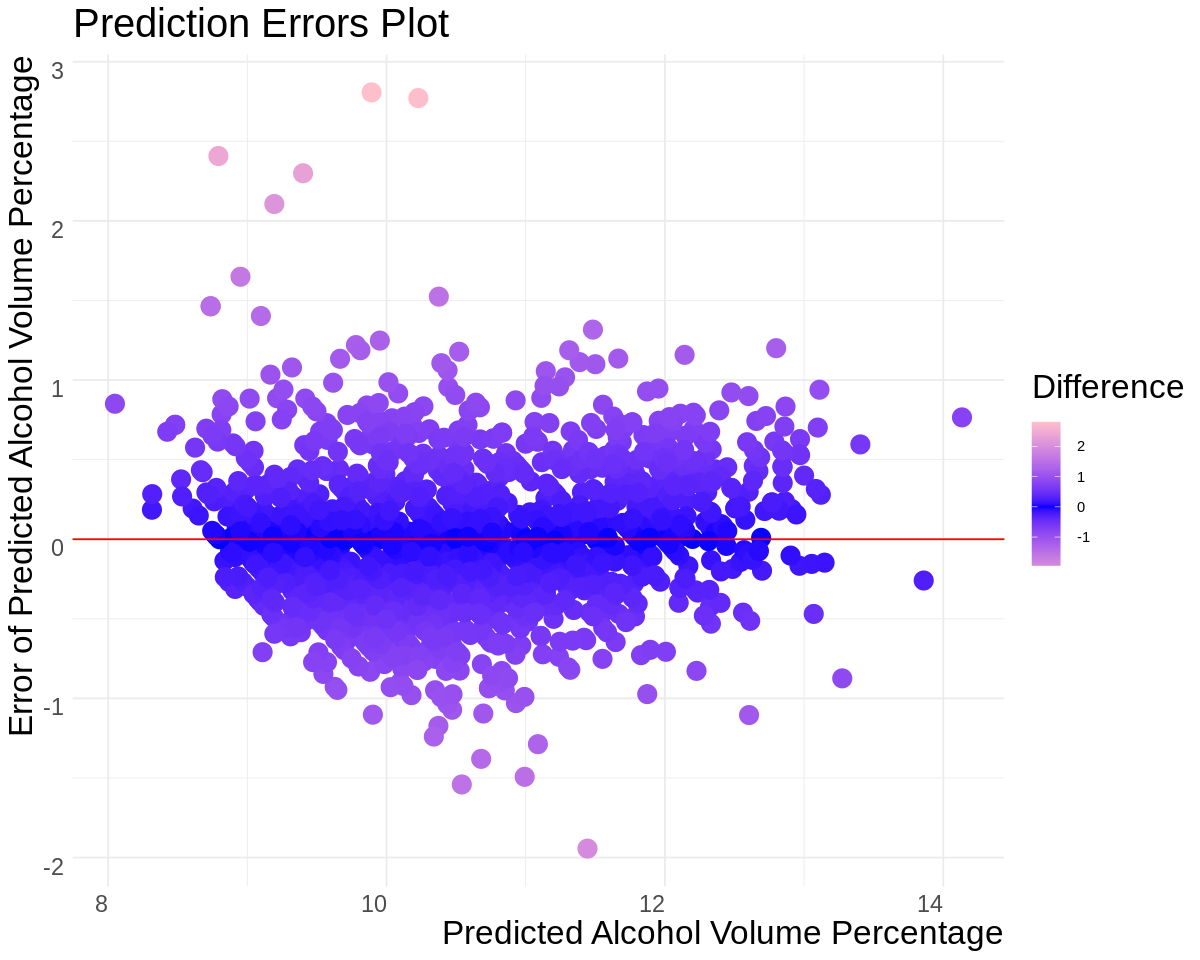

In [18]:
options(repr.plot.width = 10, repr.plot.height = 8)

wine_predict <- predict(reduced, setb)

# plotting an errors plot to observe the nature of the prediction errors produced by our model
comparison <- data.frame(pred = wine_predict, actual = setb$alcohol)
comparison$diffs <- comparison$actual - comparison$pred

errors_plot <- ggplot(comparison, aes(x = pred, y = diffs, colour = diffs)) +
    geom_point(size = 5) +
    geom_hline(yintercept = 0, color = "red") +
    scale_colour_gradient2(low = "pink", high = "pink", mid = "blue", name = "Difference") + 
    theme_minimal() +
    theme(
     axis.text.x = element_text(
         vjust = 1, size = 14, hjust = 1),
     axis.text.y = element_text(
         vjust = 1, size = 14, hjust = 1),
     title = element_text(
         vjust = 1, size = 20, hjust = 1)) +
    labs(
        title = "Prediction Errors Plot",
        x = "Predicted Alcohol Volume Percentage",
        y = "Error of Predicted Alcohol Volume Percentage"
    )
errors_plot

# Conclusion

- discuss results of model (adjR^2, errors, RMSE diff)
- full model is not that much better than reduced
- only removed one variable because they were all significant
- expected the model to fit well, maybe not this well
- maybe a diff model selection method would yield diff results
- we could have only used red or white wine; using both was not necessary, assumes that red and white wine are not fundamentally diff but we don't know that - might be worth exploring

# References

- cite dataset